In [85]:
#Goal:The goal of this project is to build a machine learning model that can predict whether
#a customer will churn (i.e., cancel their subscription) based on historical data.

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [87]:
#reading the dataset

In [88]:
df=pd.read_excel('Telco_customer_churn.xlsx')

In [89]:
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [90]:
#from the above table we can deduce
#Key columns related to churn include "Churn Label", "Churn Value", "Churn Score", and "Churn Reason".
#Some columns, like "Lat Long", "Zip Code", and "CustomerID", may not be useful for modeling.
#"Churn Value" (0 = No, 1 = Yes

In [91]:
#handling missing data

In [92]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [93]:
#the churn reason has mor empty reasons since the only time reasons were recorded was only when the customers churned
#we can choose to drop the column or fill the missing data with "Did not churn"
#lets fill with 'Did not churn' and drop the useless colums
df.fillna({'Churn Reason':'Did not churn'})
# Drop unnecessary columns
df.drop(columns=["CustomerID", "Lat Long", "Zip Code"], inplace=True)


In [94]:
#lets explore our data a little bit more

In [95]:
df.shape

(7043, 30)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              7043 non-null   int64  
 1   Country            7043 non-null   object 
 2   State              7043 non-null   object 
 3   City               7043 non-null   object 
 4   Latitude           7043 non-null   float64
 5   Longitude          7043 non-null   float64
 6   Gender             7043 non-null   object 
 7   Senior Citizen     7043 non-null   object 
 8   Partner            7043 non-null   object 
 9   Dependents         7043 non-null   object 
 10  Tenure Months      7043 non-null   int64  
 11  Phone Service      7043 non-null   object 
 12  Multiple Lines     7043 non-null   object 
 13  Internet Service   7043 non-null   object 
 14  Online Security    7043 non-null   object 
 15  Online Backup      7043 non-null   object 
 16  Device Protection  7043 

In [97]:
#from the above table we can see that total charges are saved as strings
#we can covert them to numbers by
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [98]:
#after changing we can see that there are 11 missing data we need to fix that
df.isnull().sum()

Count                   0
Country                 0
State                   0
City                    0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [105]:
#we will fill with the median value
df.fillna({'Total Charges':df["Total Charges"].median()}, inplace=True)
df.isnull().sum()

Count                   0
Country                 0
State                   0
City                    0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [100]:
#now after converting total charges from strings to numeric you can see it changed from object to float64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              7043 non-null   int64  
 1   Country            7043 non-null   object 
 2   State              7043 non-null   object 
 3   City               7043 non-null   object 
 4   Latitude           7043 non-null   float64
 5   Longitude          7043 non-null   float64
 6   Gender             7043 non-null   object 
 7   Senior Citizen     7043 non-null   object 
 8   Partner            7043 non-null   object 
 9   Dependents         7043 non-null   object 
 10  Tenure Months      7043 non-null   int64  
 11  Phone Service      7043 non-null   object 
 12  Multiple Lines     7043 non-null   object 
 13  Internet Service   7043 non-null   object 
 14  Online Security    7043 non-null   object 
 15  Online Backup      7043 non-null   object 
 16  Device Protection  7043 

In [101]:
df.describe()

,Count,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,36.282441,-119.798880,32.371149,64.761692,2281.916928,0.265370,58.699418,4400.295755
std,0.0,2.455723,2.157889,24.559481,30.090047,2265.270398,0.441561,21.525131,1183.057152
min,1.0,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.0,34.030915,-121.815412,9.000000,35.500000,402.225000,0.000000,40.000000,3469.000000
50%,1.0,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.0,38.224869,-118.043237,55.000000,89.850000,3786.600000,1.000000,75.000000,5380.500000
max,1.0,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


In [102]:
#from the above we can deduce
#that 26.5370% of the customers churned
#"Tenure Months" ranges from 0 to 72, meaning some customers may have joined very recently.
#"Monthly Charges" ranges from $18.25 to $118.75.
#"Churn Score" ranges from 5 to 100, possibly an internal churn risk metric.

In [103]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

C:\Users\admin\AppData\Local\Temp\ipykernel_11880\2573661759.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn Label", data=df, palette=["blue", "red"])
C:\Users\admin\AppData\Local\Temp\ipykernel_11880\2573661759.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn Label", y="Monthly Charges", data=df, palette=["blue", "red"])


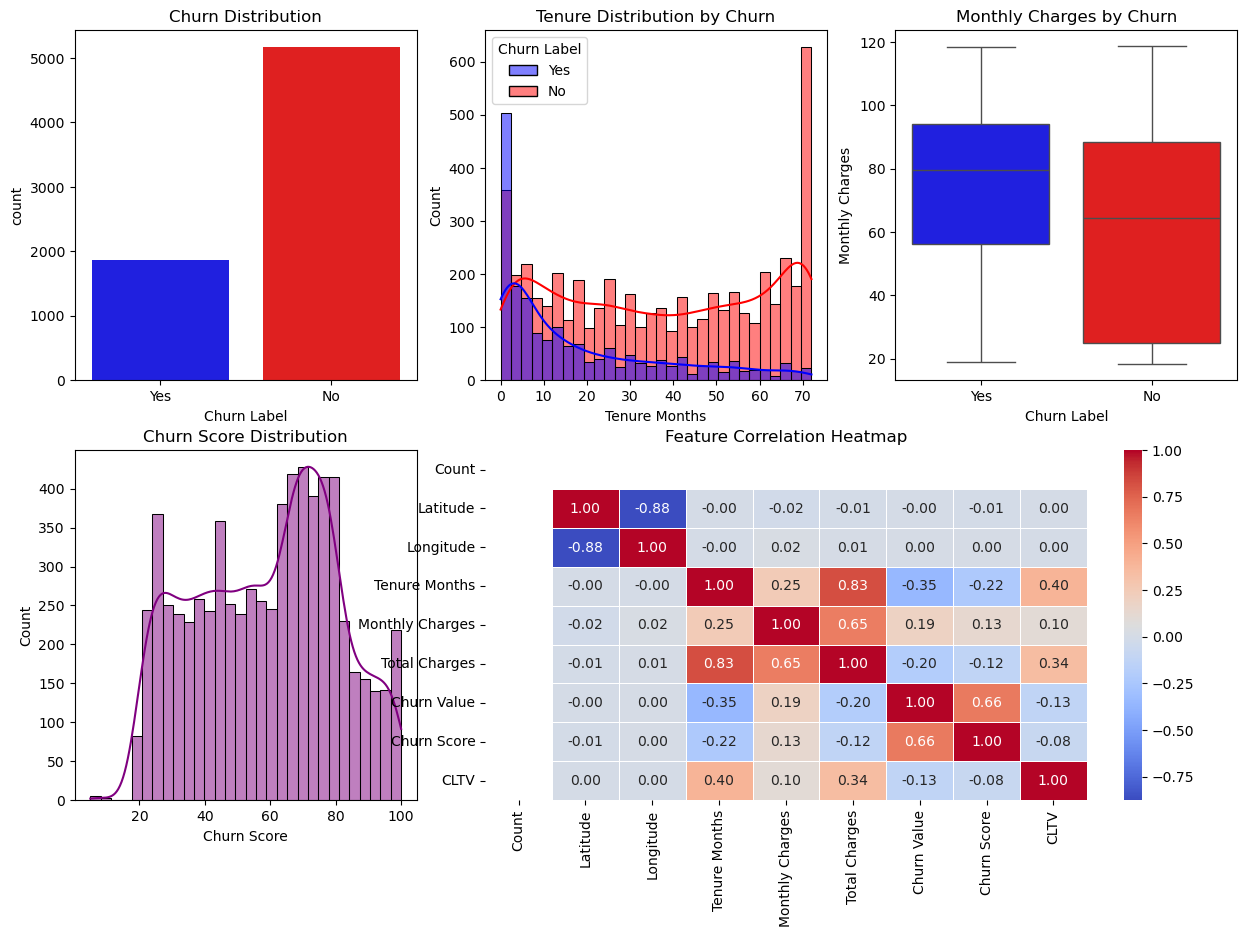

In [104]:
#after analysing our data and cleaning it we can now visualize it and come up with key insights

# Figure size
plt.figure(figsize=(15, 10))

#Churn Distribution – Bar chart of churned vs. non-churned customers.
# 1. Churn Distribution
plt.subplot(2, 3, 1)
sns.countplot(x="Churn Label", data=df, palette=["blue", "red"])
plt.title("Churn Distribution")

#Tenure vs. Churn – Customers with shorter tenure tend to churn more often.

# 2. Tenure vs. Churn
plt.subplot(2, 3, 2)
sns.histplot(df, x="Tenure Months", hue="Churn Label", kde=True, bins=30, palette=["blue", "red"])
plt.title("Tenure Distribution by Churn")

#Monthly Charges vs. Churn – Churned customers tend to have higher monthly charges.

# 3. Monthly Charges vs. Churn
plt.subplot(2, 3, 3)
sns.boxplot(x="Churn Label", y="Monthly Charges", data=df, palette=["blue", "red"])
plt.title("Monthly Charges by Churn")

#Churn Score Distribution – The churn score follows a skewed distribution, with many customers having high churn risk.

# 4. Churn Score Distribution
plt.subplot(2, 3, 4)
sns.histplot(df["Churn Score"], bins=30, kde=True, color="purple")
plt.title("Churn Score Distribution")

#Correlation Heatmap – "Churn Score" and "Churn Value" are strongly correlated, while tenure and monthly charges also show moderate correlations.

# 5. Correlation Heatmap
plt.subplot(2, 3, (5, 6))  # Merge last two subplots
corr = df.select_dtypes(include=["int64", "float64"]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")

# Adjust layout and show plots
plt.show()

In [106]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Display categorical columns
categorical_cols


['Country',
 'State',
 'City',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Churn Label',
 'Churn Reason']

In [108]:
from sklearn.preprocessing import LabelEncoder

# Drop "City" and "State" columns
df.drop(columns=["City", "State"], inplace=True)

# Apply Label Encoding to binary categorical columns
binary_cols = ["Gender", "Senior Citizen", "Partner", "Dependents", "Phone Service", "Paperless Billing", "Churn Label"]
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# Apply One-Hot Encoding to multi-category categorical columns
df = pd.get_dummies(df, columns=["Internet Service", "Contract", "Payment Method", "Churn Reason"], drop_first=True)

# Verify transformations
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Count                                                   7043 non-null   int64  
 1   Country                                                 7043 non-null   object 
 2   Latitude                                                7043 non-null   float64
 3   Longitude                                               7043 non-null   float64
 4   Gender                                                  7043 non-null   int32  
 5   Senior Citizen                                          7043 non-null   int32  
 6   Partner                                                 7043 non-null   int32  
 7   Dependents                                              7043 non-null   int32  
 8   Tenure Months                         

In [109]:
# Apply One-Hot Encoding to remaining categorical columns
categorical_cols = ["Multiple Lines", "Online Security", "Online Backup", "Device Protection",
                    "Tech Support", "Streaming TV", "Streaming Movies"]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Verify transformations
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 57 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Count                                                   7043 non-null   int64  
 1   Country                                                 7043 non-null   object 
 2   Latitude                                                7043 non-null   float64
 3   Longitude                                               7043 non-null   float64
 4   Gender                                                  7043 non-null   int32  
 5   Senior Citizen                                          7043 non-null   int32  
 6   Partner                                                 7043 non-null   int32  
 7   Dependents                                              7043 non-null   int32  
 8   Tenure Months                         

In [110]:
from sklearn.preprocessing import MinMaxScaler

# Identify numerical features for scaling
numerical_cols = ["Tenure Months", "Monthly Charges", "Total Charges", "Churn Score", "CLTV"]

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Verify scaling
df[numerical_cols].describe()


,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.449599,0.462803,0.261149,0.565257,0.533088
std,0.341104,0.299403,0.261397,0.226580,0.263077
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125000,0.171642,0.044245,0.368421,0.325995
50%,0.402778,0.518408,0.159090,0.589474,0.561263
75%,0.763889,0.712438,0.434780,0.736842,0.751056
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#so far
#Handled missing values
#Dropped irrelevant columns
#Encoded categorical variables (Label & One-Hot Encoding)
#Converted data types
#Applied Min-Max Scaling

In [ ]:
#next step
#Split data into training and test sets (e.g., 80-20 split)?
#Choose a model (Logistic Regression, Random Forest, XGBoost, etc.)